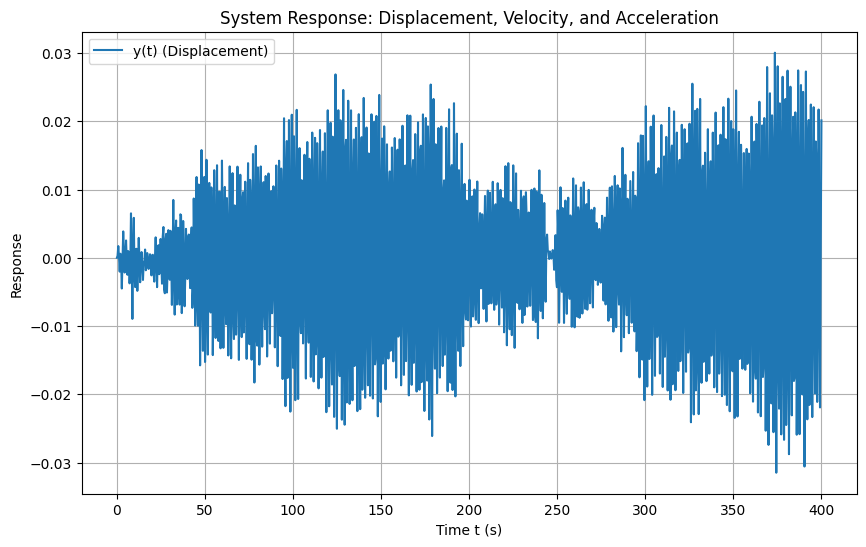

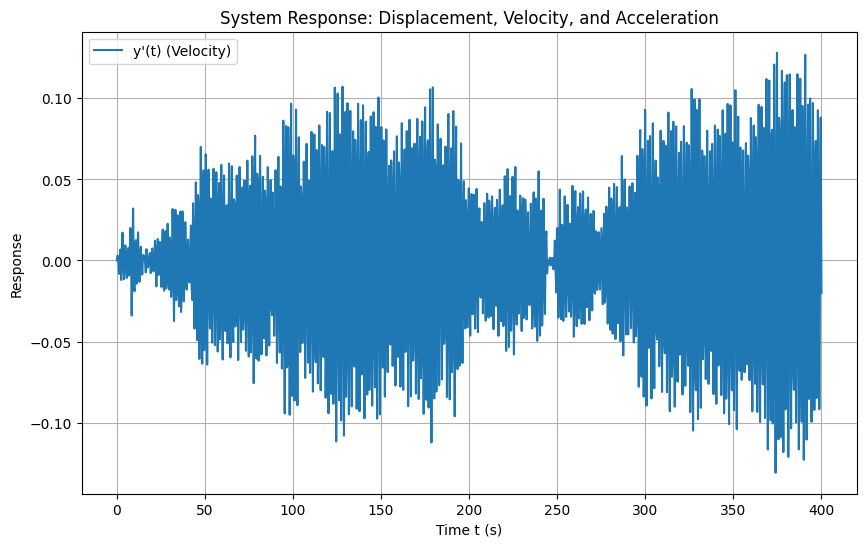

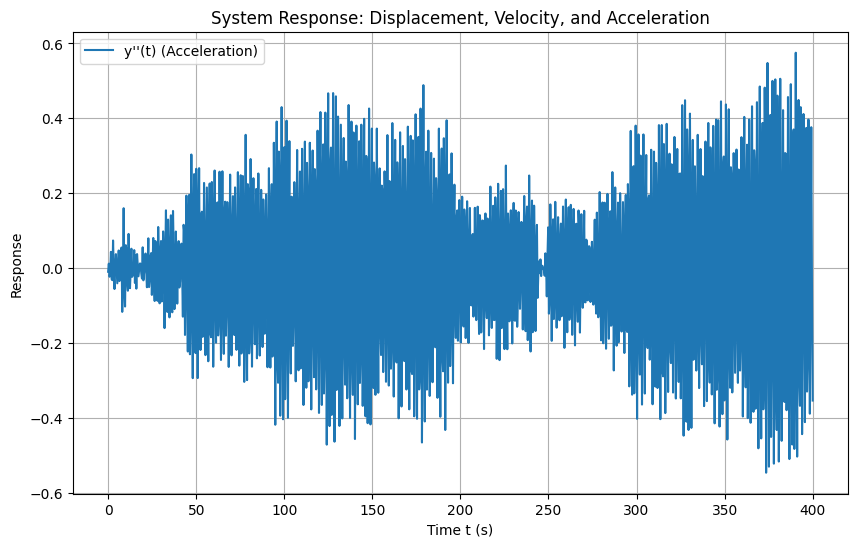

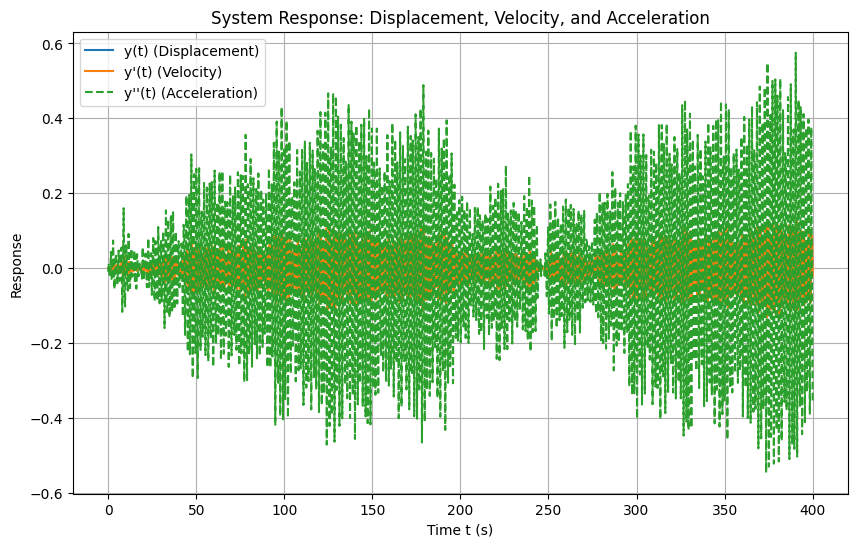

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Parameters for road surface generation
m_road = 2  # Pavement Waviness Indicator
N = 1000  # Number of samples
omega0 = 1  # Spatial Reference Frequency
phi_omega0 = 4E-6  # PSD value at the reference frequency
lower_bound = 2 * np.pi * 0.1  # Lower limit of frequency sampling
upper_bound = 2 * np.pi * 10  # Upper limit of frequency sampling
v = 90 * 1000 / 3600  # Vehicle Speed in m/s
d = 10000 # Analysis distance in m
timespan = d/v # Duration of analysis period in s

# System parameters
m = 1550  # Mass of the trailer system
c = 0.8  # Trailer damping coefficient
k = 28400  # Trailer spring constant

# Generate the road surface
omega_vect = np.linspace(lower_bound, upper_bound, N)  # Frequencies to sample
phi_vect = phi_omega0 * (omega_vect / omega0) ** -m_road
delta_omega = (omega_vect[-1] - omega_vect[0]) / (N - 1)
amp_vect = np.sqrt(phi_vect * (delta_omega / np.pi))

t_vals = np.linspace(0, timespan, 1000)  # Time values based on speed and spatial range
road_surface = np.zeros_like(t_vals)

for ii in range(N):
    phase = 2 * np.pi * np.random.rand()  # Random phase shift
    road_surface += amp_vect[ii] * np.sin(omega_vect[ii] * v * t_vals - phase)

# Interpolate the road surface
f_interp = interp1d(t_vals, road_surface, kind='cubic', fill_value="extrapolate")

# Compute the derivative f'(t) numerically
f_prime_vals = np.gradient(road_surface, t_vals)
f_prime_interp = interp1d(t_vals, f_prime_vals, kind='cubic', fill_value="extrapolate")

# Define the forcing function f(t) = (k/m)f + (c/m)f'
def forcing_function(t, k, m, c):
    return (k / m) * f_interp(t) + (c / m) * f_prime_interp(t)

# Define the system of equations
def second_order_ode(t, y, p, q, k, m, c):
    y1, y2 = y  # y1 = y, y2 = y'
    f_t = forcing_function(t, k, m, c)  # Compute the forcing function
    dydt = [y2, -p * y2 - q * y1 + f_t]  # [y', y'']
    return dydt

# Define parameters
p = c / m
q = k / m

# Initial conditions: y(0) = 1, y'(0) = 0
y0 = [ 0, 0]

# Solve the ODE
t_span = (0, timespan)
t_eval = np.linspace(0, timespan, 1000)
solution = solve_ivp(second_order_ode, t_span, y0, t_eval=t_eval, args=(p, q, k, m, c))

# Extract y(t) and y'(t)
y = solution.y[0]       # y(t)
y_dot = solution.y[1]   # y'(t)
t = solution.t          # Time points

# Compute the second derivative (acceleration)
acceleration = -p * y_dot - q * y + forcing_function(t, k, m, c)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, y, label="y(t) (Displacement)")
plt.xlabel("Time t (s)")
plt.ylabel("Response")
plt.legend()
plt.grid()
plt.title("System Response: Displacement, Velocity, and Acceleration")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, y_dot, label="y'(t) (Velocity)")
plt.xlabel("Time t (s)")
plt.ylabel("Response")
plt.legend()
plt.grid()
plt.title("System Response: Displacement, Velocity, and Acceleration")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, acceleration, label="y''(t) (Acceleration)")
plt.xlabel("Time t (s)")
plt.ylabel("Response")
plt.legend()
plt.grid()
plt.title("System Response: Displacement, Velocity, and Acceleration")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, y, label="y(t) (Displacement)")
plt.plot(t, y_dot, label="y'(t) (Velocity)")
plt.plot(t, acceleration, label="y''(t) (Acceleration)", linestyle="--")
plt.xlabel("Time t (s)")
plt.ylabel("Response")
plt.legend()
plt.grid()
plt.title("System Response: Displacement, Velocity, and Acceleration")
plt.show()
# Prepare data to write to CSV
data = zip(t, y, y_dot, acceleration)

# Specify the output file path
output_file = 'system_response.csv'

# Write data to CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write header
    writer.writerow(["Time (s)", "Displacement y(t) (m)", "Velocity y'(t) (m/s)", "Acceleration y''(t) (m/s^2)"])
    
    # Write rows of data
    writer.writerows(data)





In [78]:
# Define the acceleration threshold
threshold = 0.4  # Example threshold in m/s^2

# Count how many times the absolute value of acceleration exceeds the threshold
exceed_count = np.sum(np.abs(acceleration) > threshold)

print(f"The acceleration exceeds {threshold} m/s^2 a total of {exceed_count} times.")


The acceleration exceeds 0.4 m/s^2 a total of 76 times.
